In [1]:
#Question 1

#Installation of all necessary libraries/packages per instructions
install.packages("recommenderlab", dependencies = TRUE)
library(recommenderlab)
data(MovieLense)
install.packages("tidyr", dependencies = TRUE)
install.packages("dplyr", dependencies = TRUE)

#Inclusion of DT library, allowing for the display of data in a tabular format
install.packages("DT", dependencies = TRUE)
install.packages("datatable")

package 'recommenderlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lisa Kulka\AppData\Local\Temp\RtmpqwmrGs\downloaded_packages


Loading required package: Matrix

Loading required package: arules


Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write


Loading required package: proxy


Attaching package: 'proxy'


The following object is masked from 'package:Matrix':

    as.matrix


The following objects are masked from 'package:stats':

    as.dist, dist


The following object is masked from 'package:base':

    as.matrix


Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy



package 'tidyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lisa Kulka\AppData\Local\Temp\RtmpqwmrGs\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lisa Kulka\AppData\Local\Temp\RtmpqwmrGs\downloaded_packages

  There is a binary version available but the source version is later:
   binary source needs_compilation
DT   0.27   0.28             FALSE



installing the source package 'DT'


Warning message:
"package 'datatable' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


In [2]:
#Creation of a training data set and test data set
library(recommenderlab)
data(MovieLense)
set.seed(101)
which_train <- sample(x = c(TRUE, FALSE), size = nrow(MovieLense), replace = TRUE, 
    prob = c(0.8, 0.2))
recc_data_train <- MovieLense[which_train, ]
recc_data_test <- MovieLense[!which_train, ]

In [3]:
#Building of a recommender model using user-based collaborative filtering (UBCF)
recc_model2 <- Recommender(data = recc_data_train, method = "UBCF", parameter = list(nn = 25, 
    method = "Cosine"))
recc_model2

Recommender of type 'UBCF' for 'realRatingMatrix' 
learned using 764 users.

In [4]:
#Setting user's number of top recommendations to 10
num_rec <- 10 

recc_predicted2 <- predict(object = recc_model2, newdata = recc_data_test, n = num_rec)
recc_predicted2

Recommendations as 'topNList' with n = 10 for 179 users. 

In [5]:
#Creation of a dataframe to better visualize each user's recommendations
#Creation of a vector 'user' that repeats numbers from 1 to the length of 'recc_predicted2@items'
#Extraction of the ratings from 'recc_predicted2@ratings' and conversion to a single vector, 'rating', and creation of a new dataframe with three columns ('user', 'rating' and 'index')
rec_df <- data.frame(user = sort(rep(1:length(recc_predicted2@items), recc_predicted2@n)), 
    rating = unlist(recc_predicted2@ratings), index = unlist(recc_predicted2@items))

In [6]:
library(dplyr)
library(data.table)

#Demo'ing on three users (first is user 1)
rec_df$title <- recc_predicted2@itemLabels[rec_df$index]
rec_df$year <- MovieLenseMeta$year[rec_df$index]
rec_df <- rec_df %>% group_by(user)
data.table(rec_df[rec_df$user %in% (1), ])


Attaching package: 'dplyr'


The following objects are masked from 'package:arules':

    intersect, recode, setdiff, setequal, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last




user,rating,index,title,year
<int>,<dbl>,<int>,<chr>,<dbl>
1,5.812889,405,"Close Shave, A (1995)",1996
1,5.558120,116,Cold Comfort Farm (1995),1996
1,5.455556,997,Until the End of the World (Bis ans Ende der Welt) (1991),1991
1,5.169841,89,Blade Runner (1982),1982
1,5.169841,272,Heat (1995),1995
1,5.095556,314,As Good As It Gets (1997),1997
1,5.074603,1151,Love! Valour! Compassion! (1997),1997
1,4.981871,1039,She's the One (1996),1996
1,4.886914,873,Soul Food (1997),1997


In [7]:
library(dplyr)
library(data.table)

#Next is user 2
data.table(rec_df[rec_df$user %in% (2), ])

user,rating,index,title,year
<int>,<dbl>,<int>,<chr>,<dbl>
2,6.536281,585,"Wild Bunch, The (1969)",1969
2,5.861596,888,"Sweet Hereafter, The (1997)",1997
2,5.579016,59,Three Colors: Red (1994),1994
2,5.579016,60,Three Colors: Blue (1993),1993
2,5.579016,194,"Sting, The (1973)",1973
2,5.579016,996,"Double vie de Veronique, La (Double Life of Veronique, The) (1991)",1991
2,5.536281,614,Picnic (1955),1955
2,5.536281,657,High Noon (1952),1952
2,5.526619,83,Much Ado About Nothing (1993),1993


In [8]:
library(dplyr)
library(data.table)

#Last is user 3
data.table(rec_df[rec_df$user %in% (3), ])

user,rating,index,title,year
<int>,<dbl>,<int>,<chr>,<dbl>
3,5.135714,891,"Winter Guest, The (1997)",1997
3,4.740260,318,Paradise Lost: The Child Murders at Robin Hood Hills (1996),1996
3,4.564560,545,Rob Roy (1995),1995
3,4.451445,511,"Boot, Das (1981)",1997
3,4.451445,514,Miller's Crossing (1990),1990
3,4.395714,894,"Big Lebowski, The (1998)",1997
3,4.319083,183,Alien (1979),1979
3,4.308334,702,"Sex, Lies, and Videotape (1989)",1989
3,4.285714,865,Love Jones (1997),1997


In [9]:
#Question 2

In [10]:
#Loading of all necessary data per instructions
data(state)
state_df <- state.x77

#Removal of 'na' values to create clean data
state_df <- na.omit(state_df)

#Standardization of data to address features having different scales, using the scale function
scaled_data <- scale(state_df)

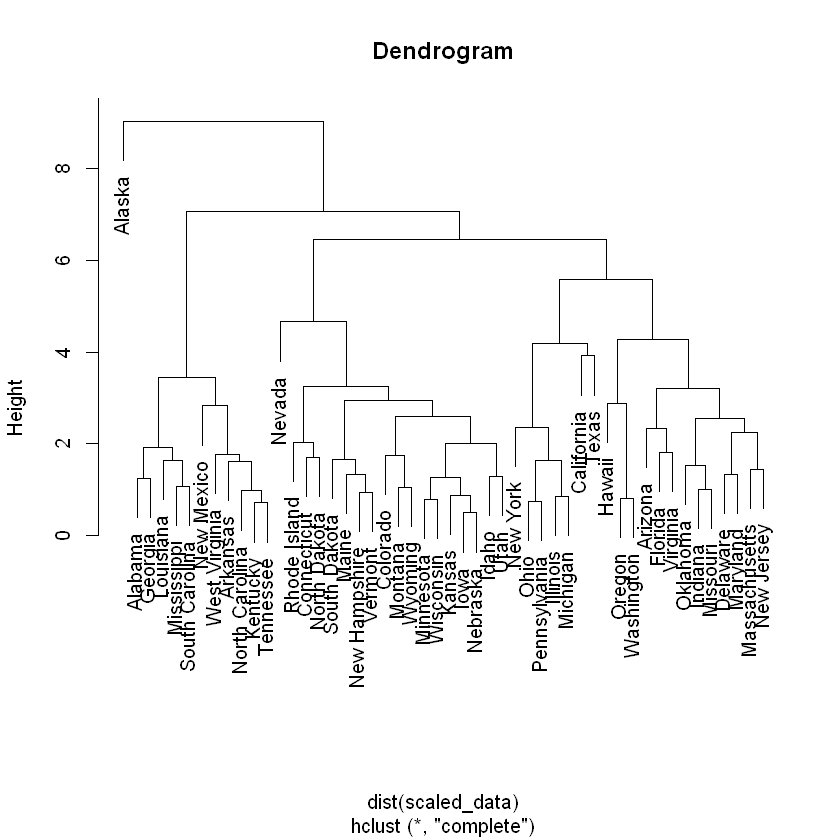

In [11]:
#2a

#Performing hierarchical clustering across the data selected as features
hc <- hclust(dist(scaled_data), method = "complete")

#Creation of a dendrogram plot
plot(hc, main = "Dendrogram")

In [12]:
#2b 

#Performing k-means clustering with values of k from 2 to 10
k_values <- 2:10  
results <- list()
for (k in k_values) {
  kmeans_result <- kmeans(state_df, centers = k, nstart = 10)
  results[[as.character(k)]] <- kmeans_result
}

#Evaluating clustering results using within-cluster sum of squares
eval_metrics <- sapply(results, function(result) {
  sum(result$withinss)
})

#Selecting the value of k based on the within-cluster sum of squares results
best_k <- which.min(eval_metrics)

#Obtaining a final clustering result using the selected k value
final_clusters <- results[[as.character(best_k)]]

#Accessing the cluster assignments for each state
cluster_assignments <- final_clusters$cluster
cat("The optimal value of k is", best_k)

The optimal value of k is 9

In [13]:
#2b k-means justification: The optimal k value is k = 9, 
#as by going from k = 2 to 10 and calculating the 
#within-cluster sum of squares, the minimum value 
#was obtained on that from the k value of 9.

In [14]:
#2c

library(cluster)
library(fpc)

#Performing k-means clustering
kmeans_clusters <- kmeans(state_df, centers = 3, nstart = 25)  

#Performing hierarchical clustering 
hierarchical_clusters <- hclust(dist(state_df))

#Comparing clustering results using a silhouette coefficient to determine quality of cluster separation
silhouette_kmeans <- silhouette(kmeans_clusters$cluster, dist(state_df))

#Comparing clustering results using both the Dunn index and Silhouette Coefficient to determine cluster separation
dunn_kmeans <- cluster.stats(dist(state_df), kmeans_clusters$cluster)$dunn
silhouette_kmeans <- silhouette(kmeans_clusters$cluster, dist(state_df))

#rand_kmeans <- adjustedRandIndex(kmeans_clusters$cluster, data$Region)  
#rand_hierarchical <- adjustedRandIndex (cutree(hierarchical_clusters, k = 3), data$Region
silhouette_hierarchical <- silhouette(cutree(hierarchical_clusters, k = 3), dist(state_df))
dunn_hierarchical <- cluster.stats(dist(state_df), cutree(hierarchical_clusters, k = 3))$dunn

#Printing of results for comparison
cat("K-means clustering results:\n") 
cat("Silhouette coefficient:", mean(silhouette_kmeans[, 3]), "\n")
cat("Dunn index:", dunn_kmeans, "\n")
cat("________________\n")
cat("Hierarchical clustering results:\n")
cat("Silhouette coefficient:", mean(silhouette_hierarchical[, 3]), "\n")
cat("Dunn index:", dunn_hierarchical, "\n")

K-means clustering results:
Silhouette coefficient: 0.5281753 
Dunn index: 0.03616003 
________________
Hierarchical clustering results:
Silhouette coefficient: 0.7436759 
Dunn index: 0.6777507 


In [15]:
# 2c Based on the output above, I argue that hierarchical 
#clustering performs better comparatively.  Per the two
#metrics used to ascertain performance 
#(Silhouette coefficient and Dunn Index), results indicate 
#that hierarchical clustering achieves better cluster 
#separation and compactness as indicated by higher 
#coefficients for each metric on that clustering type. 
#This demonstrates that a hierarchical clustering approach 
#results in more meaningful and distinct clusters in this 
#particular dataset. 

package 'ggfortify' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lisa Kulka\AppData\Local\Temp\RtmpqwmrGs\downloaded_packages


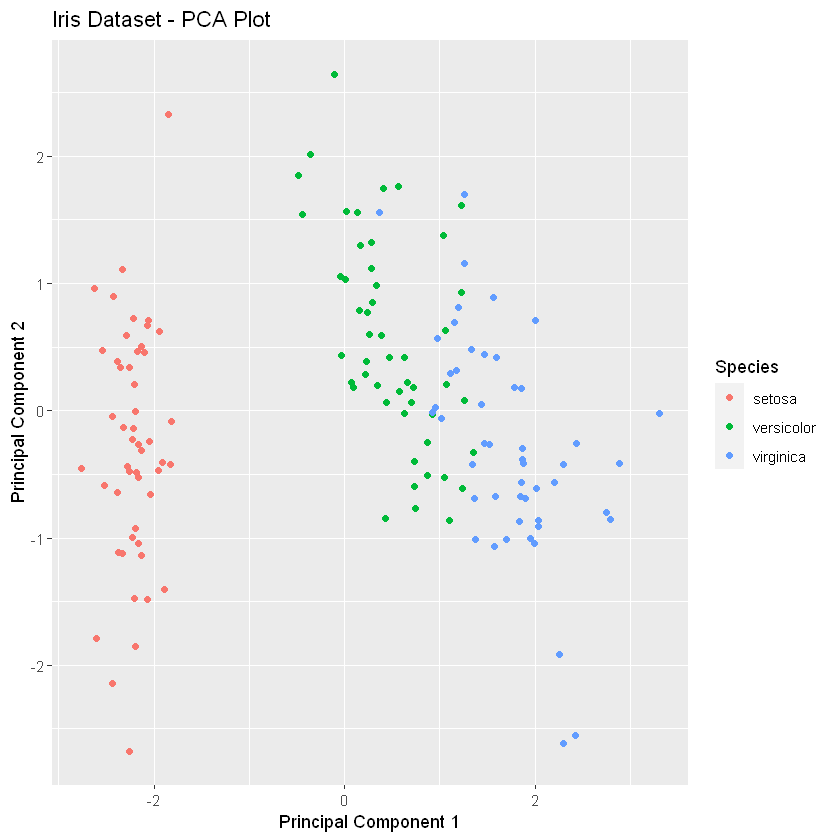

In [16]:
#Question 3

#3a

#Loading of all necessary packages, and data per instructions
library(ggplot2)
library(dplyr)
install.packages("ggfortify")
library(ggfortify)
data(iris)

#Performing Principal Component Analysis (PCA)
pca <- prcomp(iris[, 1:4], scale. = TRUE)

#Creation of a new dataframe with the principal components and species information
iris_pca <- as.data.frame(pca$x[, 1:2])
iris_pca$Species <- iris$Species

#Plotting the principal components, colored by species
ggplot(iris_pca, aes(PC1, PC2, color = Species)) +
  geom_point() +
  labs(x = "Principal Component 1", y = "Principal Component 2", title = "Iris Dataset - PCA Plot")

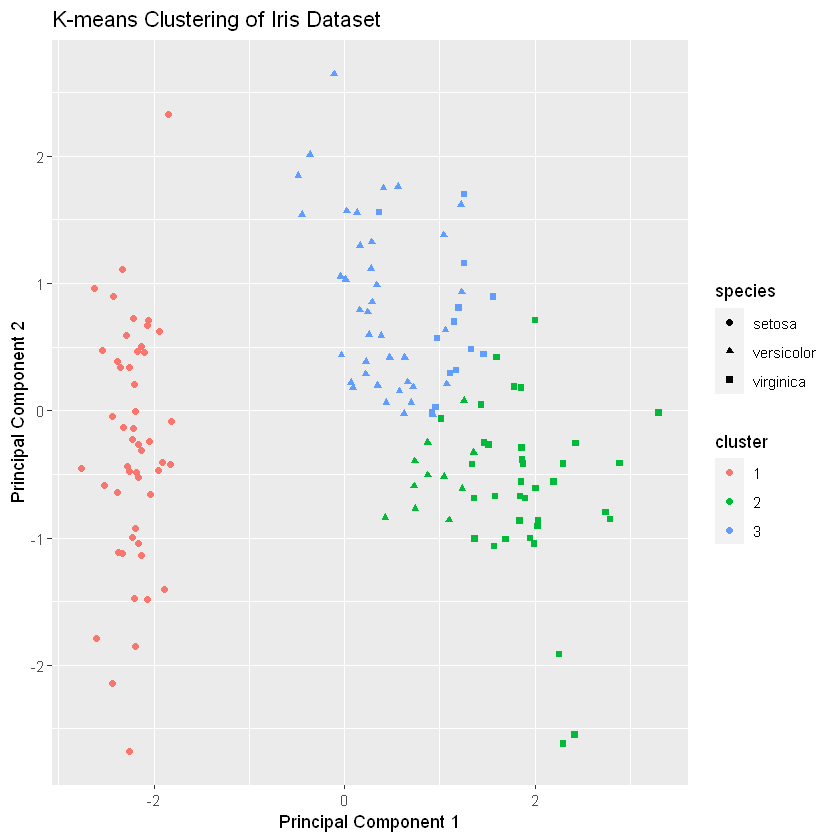

In [17]:
#3b

#Extraction of the first two principal components
pca_components <- as.data.frame(pca$x[, 1:2])

#Performing k-means clustering on the principal components, using k = 3 clusters as that is the number of species in the dataset
k <- 3  
kmeans_clusters <- kmeans(pca_components, centers = k, nstart = 10)

#Adding cluster labels to the principal components data
pca_clusters <- cbind(pca_components, cluster = as.factor(kmeans_clusters$cluster))

#Adding  species labels to the cluster data
pca_clusters <- cbind(pca_clusters, species = iris$Species)

#Plotting the clusters with different colors and symbols for the created species labels
ggplot(pca_clusters, aes(PC1, PC2, color = cluster, shape = species)) +
  geom_point() +
  labs(x = "Principal Component 1", y = "Principal Component 2", title = "K-means Clustering of Iris Dataset")

In [31]:
#3c

install.packages("fossil")
library(fossil)

#Using rand index to assess how well the cluster assignments capture the species labels
rand_index <- rand.index(kmeans_clusters$cluster, as.numeric(iris$Species))

#Using adjusted rand index to assess how well the cluster assignments capture the species labels
adj_rand_index <- adj.rand.index(kmeans_clusters$cluster, as.numeric(iris$Species))

#Producing the value for each index
cat("Rand Index:", rand_index, "\n")
cat("Adjusted Rand index:", adj_rand_index, "\n")

Warning message:
"package 'fossil' is in use and will not be installed"


Rand Index: 0.8322148 
Adjusted Rand index: 0.6201352 


In [32]:
#3c  Since the Rand Index and Adjusted Rand Index 
#are both very close to 1, this suggests that 
#clustering results based on the first two principal 
#components capture the labels well in this dataset.


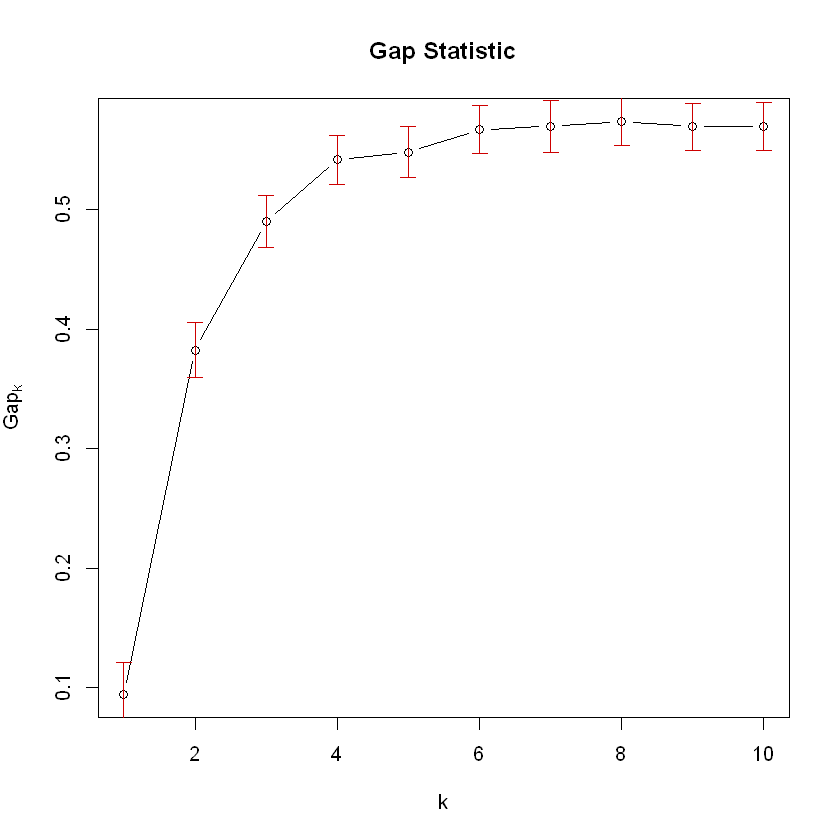

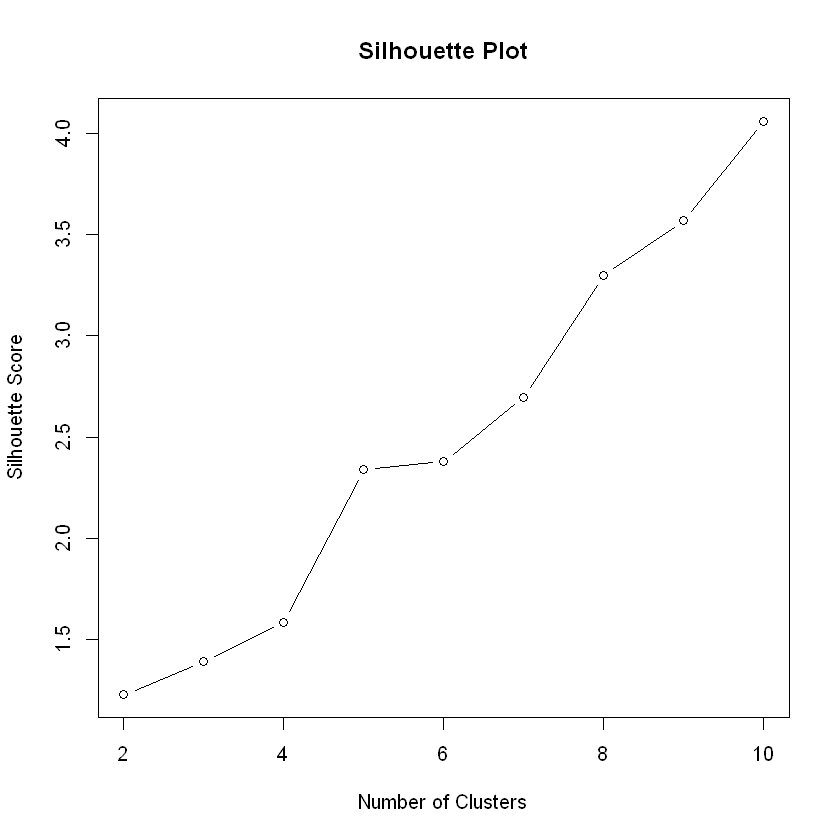

In [44]:
#3d

#Installation of all necessary libraries/packages
library(cluster)

#Computing the gap statistic
gap_stat <- clusGap(iris[, 1:4], FUN = kmeans, nstart = 10, K.max = 10)

#Plotting the gap statistic
plot(gap_stat, main = "Gap Statistic")

#Computing the silhouette scores
silhouette_scores <- numeric(length = 9)
for (k in 2:10) {
  km <- kmeans(iris[, 1:4], centers = k)
  if (length(unique(km$cluster)) > 1) {
    silhouette_scores[k-1] <- mean(silhouette(km$cluster, dist(iris[, 1:4])))
  } else {
    silhouette_scores[k-1] <- NA
  }
}

#Filtering out missing silhouette scores
valid_scores <- !is.na(silhouette_scores)

#Creating x and y vectors with valid scores
x_values <- 2:10
y_values <- silhouette_scores

#Subsetting x and y vectors with valid scores
x_values <- x_values[valid_scores]
y_values <- y_values[valid_scores]

#Plotting the available silhouette scores
plot(x_values, y_values, type = "b",
     xlab = "Number of Clusters", ylab = "Silhouette Score",
     main = "Silhouette Plot")

In [41]:
#3d Results demonstrate that for k = 8, the gap statistic is maximal, 
#which means that the optimal number of clusters is 8.
 

In [20]:
#3e While the analysis produced reasonably strong Rand Index and 
#Adjusted Rand Index values for k = 3, this value would not be the 
#optimal cluster number as per results demonstrated in #3d.  
#This indicates that data can be clustered in multiple ways and 
#having an optimal cluster number is key in this kind of analysis.  
#In addition, obtaining a best k value is an iterative process, and 
#the efficacy of gap statistics and silhouette scores should facilitate 
#and underscore the optimal selection of a k value.
